<a href="https://colab.research.google.com/github/SachinScaler/May25_Intro_to_ML_NN/blob/main/ML_Logistic_Regression_2%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
churn = pd.read_csv("https://raw.githubusercontent.com/SachinScaler/May25_Intro_to_ML_NN/refs/heads/main/churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


historical data till 5th of may: 6th June : Telecom number deactivating

In [26]:
churn.shape

(5700, 21)

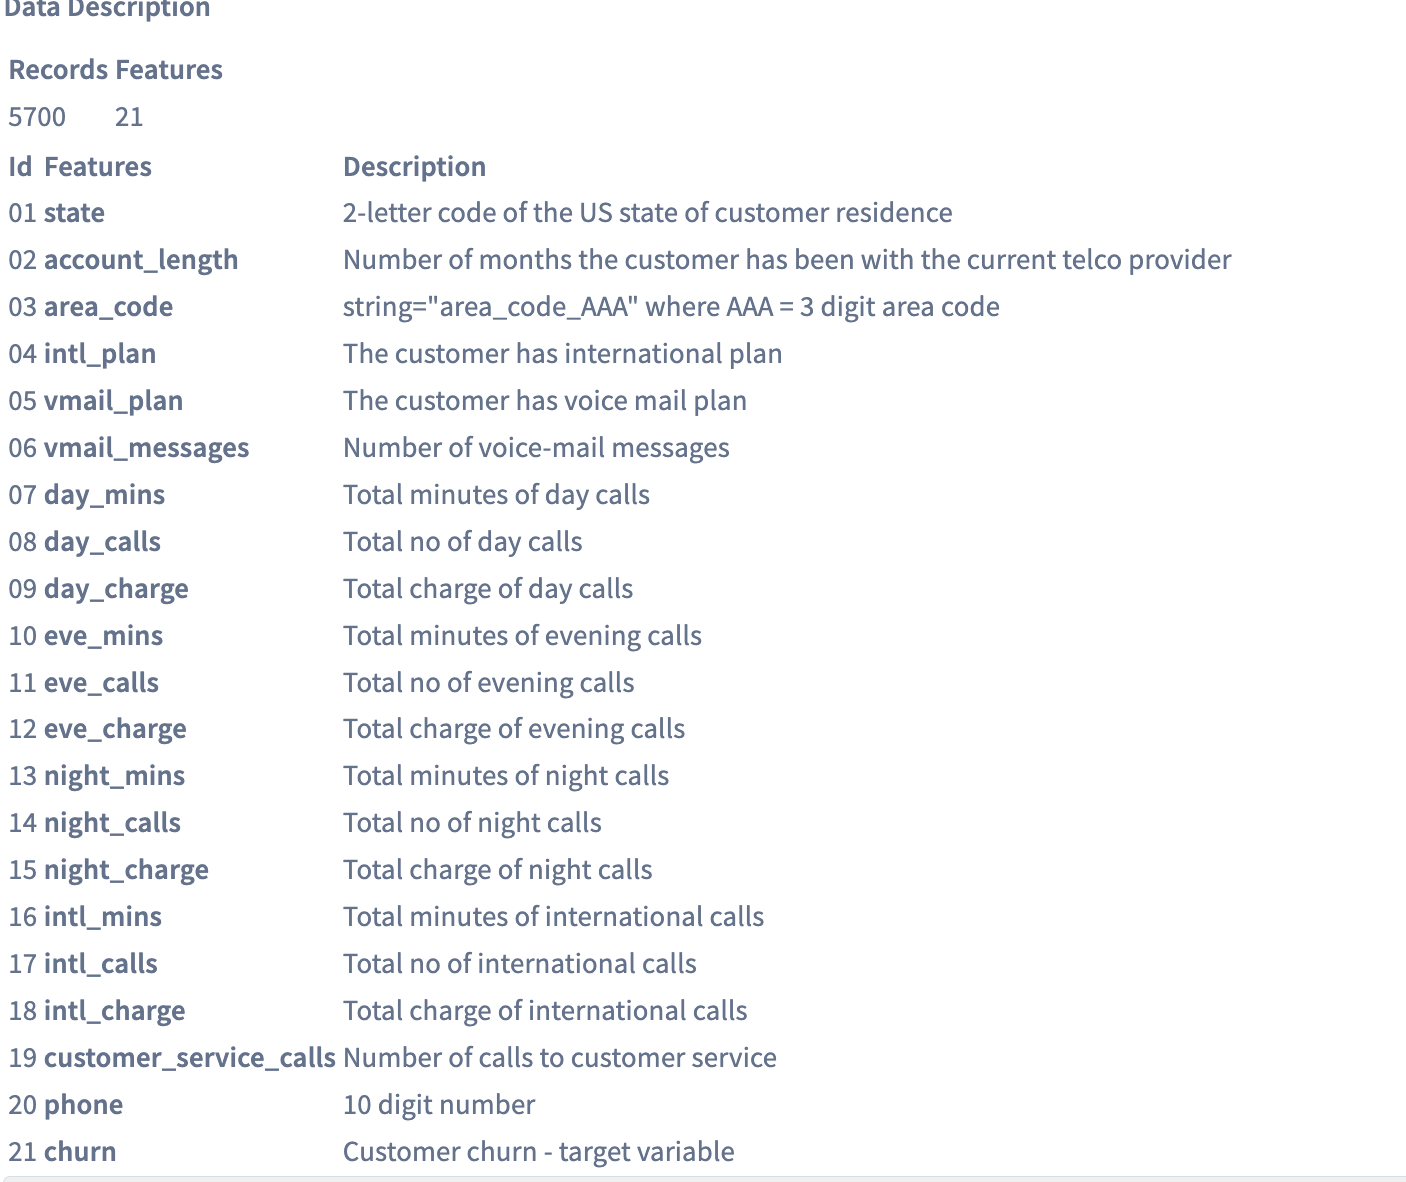

### let's implement sigmoid transformation

In [27]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.e**-z)

z = 1.99 # z = wt.x + w0
sigmoid(z)

0.8797431375322491

In [28]:
z = - 1.99 # z = wt.x + w0
sigmoid(z)

0.1202568624677508

In [29]:
# log_loss implementation

def log_loss(y, y_hat):
    loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    return -loss


In [30]:
# case 1
y = 1
y_hat = 0.99
log_loss(y, y_hat)

np.float64(0.01005033585350145)

In [31]:
y = 1
y_hat = 0.01
log_loss(y, y_hat)

np.float64(4.605170185988091)

In [32]:
y = 0
y_hat = 0.01 # prob of class 1 is very low
log_loss(y, y_hat)

np.float64(0.01005033585350145)

In [33]:
y = 0
y_hat = 0.99999
log_loss(y, y_hat)

np.float64(11.51292546497478)

In [34]:
y = 0
y_hat = 0.99
log_loss(y, y_hat)

np.float64(4.605170185988091)

### Influence of outliers on log loss: TBD

### SKlearn implementaton

In [35]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape
X = churn[cols]

X.shape

(5700, 5)

In [36]:
X.head()

,Day Mins,Eve Mins,Night Mins,CustServ Calls,Account Length
0,265.1,197.4,244.7,1,128
1,161.6,195.5,254.4,1,107
2,243.4,121.2,162.6,0,137
3,299.4,61.9,196.9,2,84
4,166.7,148.3,186.9,3,75


In [37]:
# train_test_split
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("coef", model.coef_)
print("Intercept", model.intercept_)


coef [[0.68445262 0.29104301 0.1363756  0.79630985 0.06125924]]
Intercept [-0.01220319]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
X_test.shape

(1140, 5)

In [41]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [42]:
model.predict_proba(X_test) # apply a threshold of 0.5

array([[0.23933095, 0.76066905],
       [0.54163766, 0.45836234],
       [0.78613124, 0.21386876],
       ...,
       [0.55603164, 0.44396836],
       [0.22971275, 0.77028725],
       [0.76042272, 0.23957728]])

In [43]:
y_test.T.shape, Y_pred.shape

((1, 1140), (1140,))

In [44]:
y_test.T[0]

array([1, 0, 1, ..., 0, 1, 0])

In [45]:
Y_pred.shape


accuracy = np.sum(y_test.T[0] == Y_pred) / len(y_test.T[0].T)
accuracy

np.float64(0.7008771929824561)

In [46]:
def accuracy(y_true, y_pred):
    y_true = y_test.T[0] # transformation to conver row vector into col
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy * 100

Y_pred = model.predict(X_test)
accuracy(y_test, Y_pred)

np.float64(70.08771929824562)

### TODO: HyperParameter Tuning

In [49]:
penalty =['l1', 'l2', 'elasticnet']
c = np.arange(0.01, 5000.0, 100)
print(c)

[1.00000e-02 1.00010e+02 2.00010e+02 3.00010e+02 4.00010e+02 5.00010e+02
 6.00010e+02 7.00010e+02 8.00010e+02 9.00010e+02 1.00001e+03 1.10001e+03
 1.20001e+03 1.30001e+03 1.40001e+03 1.50001e+03 1.60001e+03 1.70001e+03
 1.80001e+03 1.90001e+03 2.00001e+03 2.10001e+03 2.20001e+03 2.30001e+03
 2.40001e+03 2.50001e+03 2.60001e+03 2.70001e+03 2.80001e+03 2.90001e+03
 3.00001e+03 3.10001e+03 3.20001e+03 3.30001e+03 3.40001e+03 3.50001e+03
 3.60001e+03 3.70001e+03 3.80001e+03 3.90001e+03 4.00001e+03 4.10001e+03
 4.20001e+03 4.30001e+03 4.40001e+03 4.50001e+03 4.60001e+03 4.70001e+03
 4.80001e+03 4.90001e+03]


### TODO:
```
1) make_pipeline: Linear Regression
2) GridSearchCV(sklearn) or Bayesian_Search
```

In [ ]:
# import matplotlib.pyplot as plt


# plt.figure(figsize=(10,5))
# plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
# plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
# plt.legend(loc='lower right')

# plt.xlabel("Regularization Parameter(λ)")
# plt.ylabel("Accuracy")
# plt.grid()
# plt.show()

In [55]:
import math


# y = 1 # you can try for y = 0
# z = wt.x + wo
non_outlier_dist = 5 # z
outlier_correctly_classified = 10 # z
outlier_mis_classified = -10  # z


sigmoid = lambda z: 1 / (1 + math.e**-z)

non_outlier_y_cap = sigmoid(non_outlier_dist)
outlier_correctly_classified_y_cap = sigmoid(outlier_correctly_classified)
outlier_mis_classified_y_cap = sigmoid(outlier_mis_classified)

print("Non Outlier y_cap", non_outlier_y_cap)
print("Outlier correctly classified y_cap", outlier_correctly_classified_y_cap)
print("Outlier mis classified y_cap", outlier_mis_classified_y_cap)


# loss y = 1
loss_A = lambda y_cap: round(-1 * math.log(y_cap),3 )
print("Non Outlier Loss", loss_A(non_outlier_y_cap))
print("Outlier Correctly Classified Loss", loss_A(outlier_correctly_classified_y_cap))
print("Outlier Mis Classified Loss", loss_A(outlier_mis_classified_y_cap))

Non Outlier y_cap 0.9933071490757153
Outlier correctly classified y_cap 0.9999546021312976
Outlier mis classified y_cap 4.539786870243442e-05
Non Outlier Loss 0.007
Outlier Correctly Classified Loss 0.0
Outlier Mis Classified Loss 10.0


### implementation of multi=class

In [56]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

In [57]:
from sklearn.datasets import make_classification


X, y = make_classification(n_samples= 500,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)

y=y.reshape(len(y), 1)


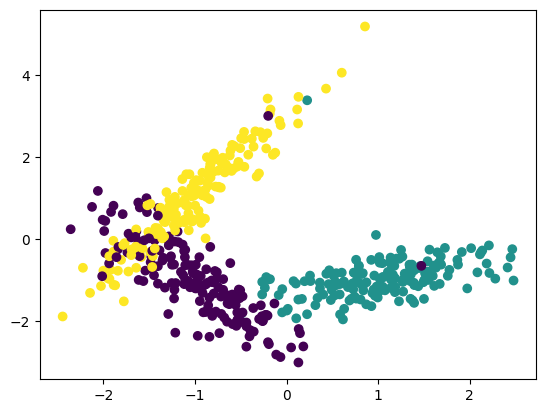

In [58]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


### Train-Test split|

In [59]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape, X_test.shape, X_val.shape

((300, 2), (100, 2), (100, 2))

In [60]:
model = LogisticRegression(multi_class='ovr')

model.fit(X_train, y_train)


print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.8633333333333333
Validation Accuracy :0.88
Test Accuracy:0.89


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [61]:
model.predict(X_train)

array([2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2,
       0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0,
       0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0,
       0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2])

In [62]:
model.predict_proba(X_train)

array([[1.02035467e-01, 1.83930494e-02, 8.79571483e-01],
       [1.14315175e-01, 8.79617003e-01, 6.06782232e-03],
       [9.20167079e-01, 5.17953114e-02, 2.80376095e-02],
       [1.26938768e-04, 2.35627732e-01, 7.64245329e-01],
       [9.72207520e-03, 9.64344389e-01, 2.59335355e-02],
       [6.24093427e-01, 3.10063289e-04, 3.75596510e-01],
       [3.22045664e-01, 6.65048958e-01, 1.29053777e-02],
       [5.42681071e-02, 2.40750016e-02, 9.21656891e-01],
       [7.91023365e-01, 1.71416235e-01, 3.75604005e-02],
       [6.03438776e-01, 1.59535402e-03, 3.94965870e-01],
       [4.03268791e-02, 9.46693001e-01, 1.29801202e-02],
       [8.93269586e-02, 8.95676275e-01, 1.49967662e-02],
       [4.24450630e-02, 8.46622818e-03, 9.49088709e-01],
       [4.18233321e-01, 2.26565287e-03, 5.79501026e-01],
       [8.81771874e-01, 3.04863021e-02, 8.77418241e-02],
       [8.69247549e-02, 8.55254638e-03, 9.04522699e-01],
       [7.53897543e-01, 1.59599065e-02, 2.30142551e-01],
       [1.04270044e-01, 8.68446

<ipython-input-63-aa3a84c38b50>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


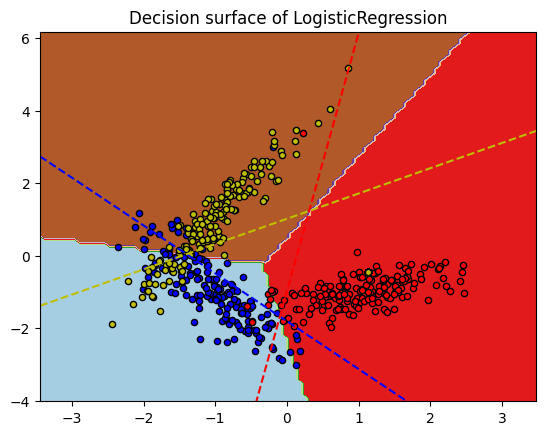

In [63]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()